## Importing the Libraries

### This imports pandas, numpy, matplotlib.pyplot, and seaborn so that they can be used to manipulate and analyze the data from the csv file.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV File

### `air_quality` is created here by using pandas to read the csv file and pull all the data into a single place.

In [89]:
air_quality = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS 430 Machine Learning/Assignment2_MEH/AirQuality_Data.csv")

## Exploring the Dataset

### `air_quality.head()` allows the user to see the first 5 rows of the dataset. `air_quality.info()` allows the user to see the total number of entries, the datatypes of each column, how many entries are null / not null, and each column in the dataset.

In [90]:
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [91]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


## Imputing Missing Values

### `air_quality.isnull().sum()` shows the sum of the number of null entries in each column of the dataset. `sns.distplot` was called for each of the columns that had null entries to see the histogram. This helps determine which method (mean, median, or mode) to use when imputing the missing data. For nearly all of the columns, the median was used since the histogram showed skewed, numerical data. Mode was used for 'wd' since it was a categorical column and mean was used for 'PRES' since it was, for the most part, a normal distribution. The `SimpleImputer` from sklearn was used to impute the missing data using these methods and `.info()' and `.isnull().sum()` was used again to show that there were no more null values in the dataset.

In [92]:
air_quality.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


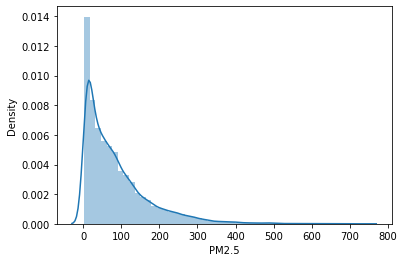

In [93]:
sns.distplot(air_quality['PM2.5'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


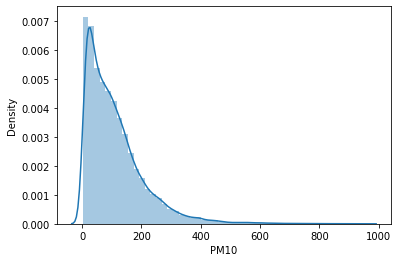

In [94]:
sns.distplot(air_quality['PM10'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


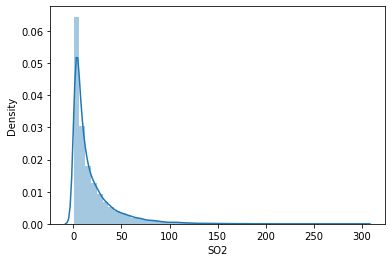

In [95]:
sns.distplot(air_quality['SO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


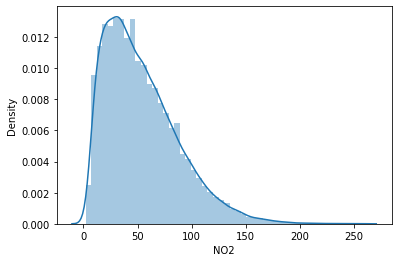

In [96]:
sns.distplot(air_quality['NO2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


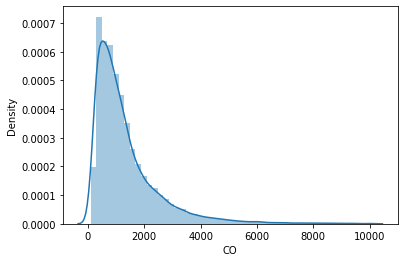

In [97]:
sns.distplot(air_quality['CO'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


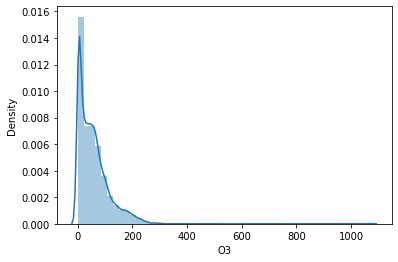

In [98]:
sns.distplot(air_quality['O3'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


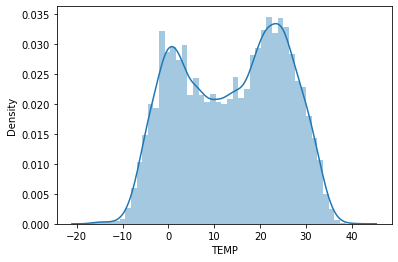

In [99]:
sns.distplot(air_quality['TEMP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


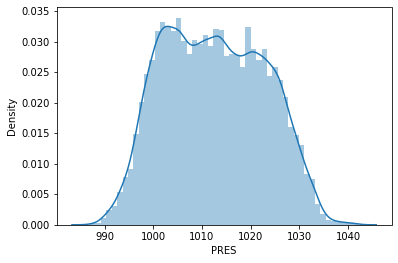

In [100]:
sns.distplot(air_quality['PRES'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


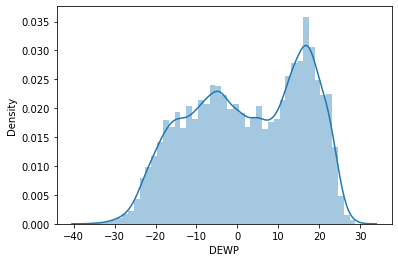

In [101]:
sns.distplot(air_quality['DEWP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


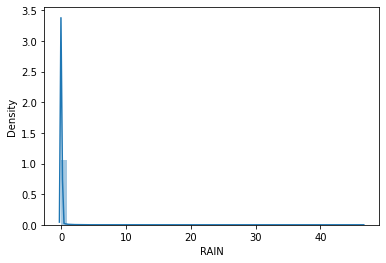

In [102]:
sns.distplot(air_quality['RAIN'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


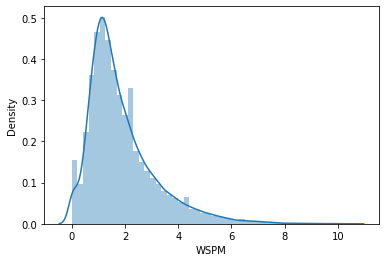

In [103]:
sns.distplot(air_quality['WSPM'])

In [104]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer_mean = SimpleImputer(strategy = "mean")
imputer_cat = SimpleImputer(strategy = "most_frequent")

In [105]:
air_quality.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [106]:
air_quality['PM2.5'] = imputer.fit_transform(air_quality[['PM2.5']])
air_quality['PM10'] = imputer.fit_transform(air_quality[['PM10']])
air_quality['SO2'] = imputer.fit_transform(air_quality[['SO2']])
air_quality['NO2'] = imputer.fit_transform(air_quality[['NO2']])
air_quality['CO'] = imputer.fit_transform(air_quality[['CO']])
air_quality['O3'] = imputer.fit_transform(air_quality[['O3']])
air_quality['TEMP'] = imputer.fit_transform(air_quality[['TEMP']])
air_quality['PRES'] = imputer_mean.fit_transform(air_quality[['PRES']])
air_quality['DEWP'] = imputer.fit_transform(air_quality[['DEWP']])
air_quality['RAIN'] = imputer.fit_transform(air_quality[['RAIN']])
air_quality['wd'] = imputer_cat.fit_transform(air_quality[['wd']])
air_quality['WSPM'] = imputer.fit_transform(air_quality[['WSPM']])

In [107]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [108]:
air_quality.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Encoding Categorical Values

### Pandas `get_dummies` was called in this section to transform the `wd` column from a categorical column into a numerical column. It also has `drop_first = True` so that an entry from each row is dropped when it becomes a column. `.info()' and `.head()` are used once again to show that `wd` now consists of numerical data and there are 15 more columns in the dataset.

In [109]:
air_quality.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [110]:
air_quality = pd.get_dummies(air_quality[['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']], drop_first = True)

In [111]:
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,...,1,0,0,0,0,0,0,0,0,0
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,...,0,1,0,0,0,0,0,0,0,0
2,3,2013,3,1,2,7.0,7.0,10.0,17.0,300.0,...,1,0,0,0,0,0,0,0,0,0
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,1000.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013,3,1,4,3.0,3.0,7.0,47.0,200.0,...,1,0,0,0,0,0,0,0,0,0


In [112]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      35064 non-null  int64  
 1   year    35064 non-null  int64  
 2   month   35064 non-null  int64  
 3   day     35064 non-null  int64  
 4   hour    35064 non-null  int64  
 5   PM2.5   35064 non-null  float64
 6   PM10    35064 non-null  float64
 7   SO2     35064 non-null  float64
 8   NO2     35064 non-null  float64
 9   CO      35064 non-null  float64
 10  O3      35064 non-null  float64
 11  TEMP    35064 non-null  float64
 12  PRES    35064 non-null  float64
 13  DEWP    35064 non-null  float64
 14  RAIN    35064 non-null  float64
 15  WSPM    35064 non-null  float64
 16  wd_ENE  35064 non-null  uint8  
 17  wd_ESE  35064 non-null  uint8  
 18  wd_N    35064 non-null  uint8  
 19  wd_NE   35064 non-null  uint8  
 20  wd_NNE  35064 non-null  uint8  
 21  wd_NNW  35064 non-null  uint8  
 22

## Splitting, Training, and Testing the Dataset

### The drop technique is used here when creating x and y variables since we are focusing on `PM2.5' which is a y value. `train_test_spllit` is imported from sklearn to create 2 train and test sets that are split 80 20 so we can train and test the data.

In [113]:
x = air_quality.drop(['PM2.5'], axis = 1)
y = air_quality['PM2.5']

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

## Linear Regression
### Adding a Bias

#### A constant bias is added to our dataset (new variation) so that linear regression can be performed. It is added to both the train and test sets using an imported stats model so that it will take bias out of the calculations.

In [115]:
import statsmodels.api as sm
x_train_bias = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [116]:
x_train_bias.head()

,const,No,year,month,day,hour,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
14850,1.0,14851,2014,11,9,18,82.0,6.0000,52.0000,800.0,...,0,0,0,0,0,0,0,0,0,1
33142,1.0,33143,2016,12,10,22,136.0,15.0000,77.0000,1400.0,...,0,0,0,0,0,1,0,0,0,0
3675,1.0,3676,2013,8,1,3,25.0,0.8568,21.5565,1000.0,...,0,0,0,0,0,0,0,1,0,0
17045,1.0,17046,2015,2,9,5,114.0,45.0000,73.0000,2200.0,...,0,0,0,0,0,0,0,0,0,0
26228,1.0,26229,2016,2,26,20,123.0,21.0000,64.0000,1400.0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
x_test_bias = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [118]:
x_test_bias.head()

,const,No,year,month,day,hour,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
14440,1.0,14441,2014,10,23,16,200.0,31.0,110.0,1700.0,...,0,0,0,1,0,0,0,0,0,0
9636,1.0,9637,2014,4,6,12,112.0,11.0,71.0,700.0,...,0,0,0,0,0,0,1,0,0,0
26391,1.0,26392,2016,3,4,15,290.0,63.0,101.0,3900.0,...,0,0,0,0,0,0,0,0,0,0
33461,1.0,33462,2016,12,24,5,103.0,47.0,62.0,1800.0,...,0,0,0,0,0,0,0,0,0,0
11122,1.0,11123,2014,6,7,10,5.0,2.0,10.0,300.0,...,0,1,0,0,0,0,0,0,0,0


### Creating Theta

#### This comes from the equation given in class to find theta. Previously created variables were plugged in to get the theta values for the dataset.

In [119]:
theta = np.linalg.inv(x_train_bias.T.dot(x_train_bias)).dot(x_train_bias.T).dot(y_train)

In [120]:
theta

array([ 3.18912014e+06,  1.80814585e-01, -1.58426551e+03, -1.32549446e+02,
       -4.44678903e+00, -2.12200895e-01,  5.62875037e-01,  3.79970729e-01,
        1.60214574e-01,  1.46252477e-02,  1.17033875e-01, -1.03587961e+00,
        3.95297931e-01,  1.57216782e+00, -2.33943696e-01, -8.00957515e-01,
        6.72930285e-01,  6.46551036e-01,  3.77142792e+00, -1.49667476e-01,
        1.47566313e+00,  3.88170287e+00,  1.26586742e+00,  2.16470412e+00,
        2.08371557e-01,  1.10254068e+00,  3.79848328e+00,  2.10462908e-01,
        5.26127704e-01,  2.29655940e+00,  1.32722364e+00])

### Predicting Y

#### `y_predict` is created to predict the y values and compare them to the original `y_test` values. The prediction is slightly off from the actual values meaning the model is not entirely accurate and needs to be trained again to get better prediction values.

In [121]:
y_predict = x_test_bias.dot(theta)

In [122]:
y_predict

14440    155.089684
9636      46.432685
26391    249.004765
33461     98.075074
11122     -5.213918
            ...    
33770    188.252905
2178      80.185763
31117     27.347989
27017     62.101818
25225    151.995459
Length: 7013, dtype: float64

In [123]:
y_test

14440    128.0
9636      58.0
26391    290.0
33461     91.0
11122      3.0
         ...  
33770    213.0
2178      46.0
31117     21.0
27017     56.0
25225    173.0
Name: PM2.5, Length: 7013, dtype: float64

### Scikit Learn

#### Linear Regression is performed, using the x and y training sets. A new `y_pred` is created based on the `x_test` data.

In [124]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [125]:
y_pred = regressor.predict(x_test)

### Determining Score and RMSE

#### `.score` is used to determine the accuracy of the model for both train and test sets. Both sets are accurate since they are both about 85%, meaning it is a working model. `RMSE` shows that all the model is accurate, there is still about a 33% error in the model.

In [126]:
regressor.score(x_train, y_train)

0.857337699889481

In [127]:
regressor.score(x_test, y_test)

0.8484179271768283

In [128]:
from sklearn.metrics import mean_squared_error
RMSE_linear = mean_squared_error(y_true = y_test, y_pred = y_pred, squared = False)
print(RMSE_linear)

33.49470719387208


## Stochastic Gradient Descent

#### A pipeline was created to perform scaling and `SGDRegressor` on the data set in order to do Stochastic Gradient Descent. It was then fitted to train both x and y training sets. '.score' shows that for both the training and tests sets the model accuracy is about 84% which means the model is successfully working with accuracy. With this being said, the `RMSE` shows that there is still about a 34% error in the model which is slighly higher than Linear Regression.

In [129]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [130]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter = 1000, tol = 1e-3, eta0 = 0.07))
reg.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(eta0=0.07))])

In [131]:
reg.score(x_train, y_train)

0.8501928957812163

In [132]:
reg.score(x_test, y_test)

0.8396939873668801

In [133]:
y_pred_SGD = reg.predict(x_test)
RMSE_SGD = mean_squared_error(y_true = y_test, y_pred = y_pred_SGD, squared = False)
print(RMSE_SGD)

34.44507785700435


## Poly Regression

#### A pipeline was created using `PolynomialFeatures` and `LinearRegression` allowing the model to fit to x and y. A new 'y_pred_poly` variable was created to predict from `x_test`. `.score` shows that this model has a very high accuracy of around 90% and the lowest `RMSE` of about 26%. This is the most accurate model for this dataset since it has the highest accuracy score and the lowest error percentage.

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [135]:
poly_model = Pipeline([('Polynomial', PolynomialFeatures(degree = 2)), 
                       ('Model', LinearRegression())])

In [136]:
poly_model.fit(x, y)

Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                ('Model', LinearRegression())])

In [137]:
y_pred_poly = poly_model.predict(x_test)

In [138]:
poly_model.score(x_train, y_train)

0.9192395852257023

In [139]:
poly_model.score(x_test, y_test)

0.9086640118472635

In [140]:
RMSE_poly = mean_squared_error(y_true = y_test, y_pred = y_pred_poly, squared = False)
print(RMSE_poly)

25.99999297767991


## Ridge Regression

#### Ridge Regeression stems from Linear Regression so it is fit to x and y train using the `linear_model` from sklearn. `.score' shows that the training and test sets both have an accuracy of about 85% and an `RMSE` of about 33%, meaning that the model is accurate, but has a high error percentage.

In [141]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 2, max_iter = 1000, tol = 0.5)
ridge_model.fit(x_train, y_train)

Ridge(alpha=2, max_iter=1000, tol=0.5)

In [142]:
ridge_model.score(x_train, y_train)

0.8565686725887094

In [143]:
ridge_model.score(x_test, y_test)

0.8478172965704116

In [144]:
y_pred_ridge = ridge_model.predict(x_test)

In [145]:
RMSE_ridge = mean_squared_error(y_test, y_pred_ridge, squared = False)
print(RMSE_ridge)

33.5610015003414


## Lasso Regression

#### Lasso Regeression also stems from Linear Regression so it is fit to x and y train using the `linear_model` from sklearn. `.score' shows that the training and test sets both have an accuracy of about 83% and the same `RMSE` as Ridge Regression with about a 33% error, meaning that the model is accurate, but has a high error percentage.

In [146]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 100, max_iter = 1000, tol = 0.5)
lasso_model.fit(x_train, y_train)

Lasso(alpha=100, tol=0.5)

In [147]:
lasso_model.score(x_train, y_train)

0.8330017255186235

In [148]:
lasso_model.score(x_test, y_test)

0.8256674049992432

In [149]:
y_pred_lasso = ridge_model.predict(x_test)

In [150]:
RMSE_lasso = mean_squared_error(y_test, y_pred_lasso, squared = False)
print(RMSE_lasso)

33.5610015003414


## Elastic Net Regression

#### Elastic Net Regeression uses both Ridge and Lasso in its formula so it too stems from Linear Regression, fiting to x and y train using the `linear_model` from sklearn. `.score' shows that the training and test sets both have an accuracy of about 85% and the same `RMSE` as Ridge and Lasso Regression with about a 33% error, meaning that the model is accurate, but has a high error percentage.

In [151]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
elastic_net_model.fit(x_train, y_train)

ElasticNet(alpha=0.01)

In [152]:
elastic_net_model.score(x_train, y_train)

0.8564999390427278

In [153]:
elastic_net_model.score(x_test, y_test)

0.8477512905992841

In [154]:
y_pred_en = ridge_model.predict(x_test)

In [155]:
RMSE_EN = mean_squared_error(y_test, y_pred_en, squared = False)
print(RMSE_EN)

33.5610015003414


## Comparing Regressions in Pretty Table

#### `PrettyTable` is imported so that Linear Regression, Stochastic Gradient Descent, Poly Regression, Ridge Regression, Lasso Regression, and Elastic Net Regression can all have their training scores, test scores, and RMSE compared to one another. All of the regressions (except Poly Regression) have around an 85% score for training, an 84% score for testing, and 33% error. These are all accurate scores with a high error percentage. Poly Regression is the best type of regression for this model since it has the highest scores of 92% (training) and 91% (testing) and the lowest RMSE percentage of 26%.

In [156]:
from prettytable import PrettyTable

In [157]:
myTable = PrettyTable(["Model", "Training_Score", "Test_Score", "RMSE"])

In [158]:
myTable.add_row(["Linear Regression", regressor.score(x_train, y_train), regressor.score(x_test, y_test), RMSE_linear])
myTable.add_row(["Stochastic Gradient Descent", reg.score(x_train, y_train), reg.score(x_test, y_test), RMSE_SGD])
myTable.add_row(["Poly Regression", poly_model.score(x_train, y_train), poly_model.score(x_test, y_test), RMSE_poly])
myTable.add_row(["Ridge Regression", ridge_model.score(x_train, y_train), ridge_model.score(x_test, y_test), RMSE_ridge])
myTable.add_row(["Lasso Regression", lasso_model.score(x_train, y_train), lasso_model.score(x_test, y_test), RMSE_lasso])
myTable.add_row(["Elastic Net Regression", elastic_net_model.score(x_train, y_train), elastic_net_model.score(x_test, y_test), RMSE_EN])

In [159]:
print(myTable)

+-----------------------------+--------------------+--------------------+-------------------+
|            Model            |   Training_Score   |     Test_Score     |        RMSE       |
+-----------------------------+--------------------+--------------------+-------------------+
|      Linear Regression      | 0.857337699889481  | 0.8484179271768283 | 33.49470719387208 |
| Stochastic Gradient Descent | 0.8501928957812163 | 0.8396939873668801 | 34.44507785700435 |
|       Poly Regression       | 0.9192395852257023 | 0.9086640118472635 | 25.99999297767991 |
|       Ridge Regression      | 0.8565686725887094 | 0.8478172965704116 |  33.5610015003414 |
|       Lasso Regression      | 0.8330017255186235 | 0.8256674049992432 |  33.5610015003414 |
|    Elastic Net Regression   | 0.8564999390427278 | 0.8477512905992841 |  33.5610015003414 |
+-----------------------------+--------------------+--------------------+-------------------+
